<a href="https://colab.research.google.com/github/PaoDeV99/ML_Progetto1_G72/blob/master/NN_Mini_BooNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
#Various basic imports and libraries

import tensorflow as tf
from tensorflow import keras

import numpy as np

import pandas as pd
import time
import warnings

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy import stats

warnings.filterwarnings('ignore')

In [15]:
df_old = pd.read_fwf('/content/drive/My Drive/Colab Notebooks/dataset/MiniBooNE_PID.txt')

In [16]:
df_old["signal"]=0
df_old.iloc[0:36498,50]=1
df_old.iloc[36499:,50]=0
df_old

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,signal
0,2.59413,0.468803,20.6916,0.322648,0.009682,0.374393,0.803479,0.896592,3.59665,0.249282,4.18624,135.885000,0.928671,0.140918,2.58663,1689.070,1.197950,19.35610,0.398340,0.658684,1.561270,0.320885,108.8560,5.16994,0.491493,0.868283,29.6141,1.222990,0.190005,-0.654163,4.97666,0.908007,0.385076,377.412,0.136108,0.310650,2.952640,-4.55567,0.934167,0.049752,101.174,-31.37300,0.442259,5.86453,0.000000,0.090519,0.176909,0.457585,0.071769,0.245996,1
1,3.86388,0.645781,18.1375,0.233529,0.030733,0.361239,1.069740,0.878714,3.59243,0.200793,4.65578,331.718000,0.882784,0.368855,2.24638,1388.260,0.839230,6.69510,0.277778,0.944626,1.664640,0.256501,102.4930,5.33218,0.474294,-0.336652,31.5767,1.317170,0.141945,0.093886,5.05478,1.394390,0.325034,215.837,0.082048,0.297530,0.777241,-4.76871,1.438210,0.068714,186.516,45.95970,-0.478507,6.11126,0.001182,0.091800,-0.465572,0.935523,0.333613,0.230621,1
2,3.38584,1.197140,36.0807,0.200866,0.017341,0.260841,1.108950,0.884405,3.43159,0.177167,4.50807,159.396000,0.412250,0.434002,2.38485,992.098,0.514175,16.00300,0.256262,0.318984,-0.727361,0.312139,69.8362,3.44976,0.497076,-0.314786,59.2516,1.187650,0.192565,-0.511144,5.27196,1.002860,1.690870,417.430,0.068628,0.220612,1.390970,-2.02213,1.843790,0.085132,129.931,-11.56080,-0.297008,8.27204,0.003854,0.141721,-0.210559,1.013450,0.255512,0.180901,1
3,4.28524,0.510155,674.2010,0.281923,0.009174,0.000000,0.998822,0.823390,3.16382,0.171678,4.08041,-1.865600,0.833067,0.181294,2.49837,1289.160,0.630307,12.93740,0.266055,1.313580,0.698101,0.306193,148.0340,4.12461,0.494778,0.331151,17.8265,1.700340,0.147487,0.313964,7.91668,1.584410,0.557134,352.699,0.079246,0.338915,-0.331218,-3.52184,1.244390,0.105550,163.978,-18.45860,0.453886,2.48112,0.000000,0.180938,0.407968,4.341270,0.473081,0.258990,1
4,5.93662,0.832993,59.8796,0.232853,0.025066,0.233556,1.370040,0.787424,3.66546,0.174862,4.59180,183.668000,0.398421,0.353034,2.04136,949.231,0.389585,13.91750,0.281003,0.282402,-0.039672,0.233509,106.8670,2.94245,0.464260,-0.033102,139.4700,1.687930,0.117804,0.021927,7.80990,1.317420,0.677348,317.556,0.041526,0.249403,-0.360560,-3.18766,1.808670,0.105852,229.555,42.96000,-0.975752,2.66109,0.000000,0.170836,-0.814403,4.679490,1.924990,0.253893,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,4.80718,1.451020,174.6920,0.343481,0.002174,0.000000,0.747401,0.725617,3.18501,0.152208,4.09329,-0.707947,0.813344,0.015294,1.83104,520.017,0.192353,7.59299,0.271739,0.580181,2.706590,0.321739,18.9165,4.77587,0.488641,0.578023,106.1100,1.827670,0.174318,0.523787,7.59281,1.451220,0.616285,453.588,0.015260,0.291661,-0.445277,-3.02319,1.513750,0.055040,179.832,-2.74376,0.317051,2.67617,0.000000,0.141958,0.723207,7.446300,3.219320,0.299487,0
130060,5.00527,1.501860,129.9270,0.273477,0.006098,0.109769,1.325370,0.830334,3.40836,0.130794,4.23870,49.729900,0.527637,0.337350,2.32783,779.822,0.295920,12.35990,0.280488,1.630800,-0.447177,0.302846,64.8961,2.66737,0.443424,-0.060302,149.7250,1.565400,0.138097,0.199993,7.29614,1.130380,1.100050,414.089,0.072055,0.288639,0.780298,-2.74524,1.216240,0.110098,120.794,-24.72180,0.312652,4.16524,0.000000,0.232273,0.141153,1.898750,1.778180,0.258058,0
130061,3.10842,2.178140,56.3651,0.211850,0.000000,0.

In [17]:
#Shuffling
df = df_old.sample(frac=1).reset_index(drop=True)

In [18]:
df

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,signal
0,3.64377,2.421400,23.51740,0.257363,0.003021,0.344804,1.082440,0.808382,3.36564,0.188986,4.23496,216.7920,-0.250675,0.164267,1.88390,467.208,0.238526,9.39245,0.293051,1.774710,1.774080,0.335347,35.2535,5.82893,0.488814,1.133080,2.76266,1.16175,0.156973,-0.373186,4.86227,1.256050,0.799153,324.495,0.060210,0.393464,1.769320,-3.183960,1.023580,0.072672,109.9370,-4.85305,0.976034,4.23871,0.000000,0.072619,0.233604,1.78693,0.314561,0.201697,1
1,4.73887,2.533070,79.93220,0.401712,0.008811,0.037387,1.049120,0.825321,3.83766,0.205736,4.20983,52.2229,0.689525,0.175716,2.55456,544.122,0.217244,19.27110,0.431718,0.130543,2.286300,0.325991,18.5554,4.62957,0.456119,2.556940,58.18040,1.18080,0.344358,-0.898567,5.26476,0.610918,1.362770,469.993,0.102300,0.217049,1.494720,-2.373470,1.211170,0.036178,67.5121,-45.34480,0.653386,5.47032,0.000000,0.091269,0.217311,1.30380,-0.424848,0.221107,0
2,4.78233,1.076220,9.85801,0.301452,0.000000,0.267750,0.927921,0.802282,3.22399,0.169143,4.00798,77.5841,0.031294,0.070748,2.03724,737.479,0.303272,3.58992,0.240678,0.728699,1.676080,0.310169,61.1302,3.72267,0.457137,0.058318,102.91700,1.72322,0.168959,0.298390,8.43854,1.429170,0.666229,418.880,0.055734,0.312803,-0.038765,-3.355160,1.144960,0.092256,163.2020,-10.55900,0.994977,1.75141,0.000000,0.197405,0.727480,5.49065,1.670760,0.249547,1
3,5.76593,1.284980,157.90500,0.415536,0.000000,0.167226,0.774509,0.816767,3.56311,0.139173,4.37218,160.6850,0.464282,0.649229,1.46589,683.106,0.261468,20.35360,0.226714,0.831623,-2.054270,0.214411,50.7153,3.16498,0.448059,-3.671780,148.28000,1.63787,0.188275,-0.784575,8.41971,0.850901,0.392561,377.125,0.085454,0.303808,0.004064,-4.074690,1.340510,0.085830,150.5230,-39.54110,0.694693,9.58805,0.001757,0.214720,-0.516301,2.53352,2.174100,0.159028,0
4,6.75794,1.641180,84.82030,0.199412,0.029762,0.074714,2.908620,0.882723,3.72697,0.405711,4.42699,90.7595,0.811015,0.148793,2.85622,694.063,0.293841,35.80200,0.372024,0.484115,-2.550000,0.351190,28.2531,9.49588,0.478570,0.821208,125.87300,2.11785,0.179290,-0.450263,7.25121,0.687315,0.995756,428.487,0.080861,0.343139,-0.604673,-3.316420,0.715778,0.029305,98.4641,-33.21310,0.174889,4.23482,0.000000,0.037349,0.412258,1.42968,2.671480,0.291814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,5.09735,0.669371,127.20200,0.323196,0.001263,0.124150,0.721523,0.866058,3.03940,0.140778,3.78584,106.3080,0.250846,0.006278,2.46310,1056.670,0.444454,20.30400,0.209596,0.689993,2.945140,0.332071,54.0759,5.11887,0.440589,0.143395,167.86600,1.84535,0.204139,0.343582,8.68999,1.255480,0.739143,459.682,0.030205,0.245818,-0.248236,-3.269530,1.592810,0.057174,177.0020,9.65121,0.245283,1.49930,0.000000,0.142660,0.638239,4.77645,2.254140,0.266364,0
130060,5.62818,2.283930,72.13860,0.325840,0.006024,0.123458,1.261010,0.823567,3.61238,0.131975,4.26763,172.9380,0.972146,0.148604,2.05222,586.935,0.222172,50.45010,0.355422,0.221981,0.742750,0.274096,29.0694,4.16380,0.323220,1.159930,140.65300,1.78045,0.193102,-1.199760,8.06075,0.712972,0.952720,378.018,0.047163,0.255360,0.128493,-3.088010,1.150000,0.064057,134.2340,-45.91370,0.987883,7.31190,0.000000,0.142437,0.186233,2.70006,2.361150,0.272407,0
130061,4.50544,1.294250,122.98200,0.261887,0.001957,0.134829,1.21

In [19]:
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
df

,36499 93565,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,signal
0,3.64377,2.421400,23.51740,0.257363,0.003021,0.344804,1.082440,0.808382,3.36564,0.188986,4.23496,216.7920,-0.250675,0.164267,1.88390,467.208,0.238526,9.39245,0.293051,1.774710,1.774080,0.335347,35.2535,5.82893,0.488814,1.133080,2.76266,1.16175,0.156973,-0.373186,4.86227,1.256050,0.799153,324.495,0.060210,0.393464,1.769320,-3.183960,1.023580,0.072672,109.9370,-4.85305,0.976034,4.23871,0.000000,0.072619,0.233604,1.78693,0.314561,0.201697,1
1,4.73887,2.533070,79.93220,0.401712,0.008811,0.037387,1.049120,0.825321,3.83766,0.205736,4.20983,52.2229,0.689525,0.175716,2.55456,544.122,0.217244,19.27110,0.431718,0.130543,2.286300,0.325991,18.5554,4.62957,0.456119,2.556940,58.18040,1.18080,0.344358,-0.898567,5.26476,0.610918,1.362770,469.993,0.102300,0.217049,1.494720,-2.373470,1.211170,0.036178,67.5121,-45.34480,0.653386,5.47032,0.000000,0.091269,0.217311,1.30380,-0.424848,0.221107,0
2,4.78233,1.076220,9.85801,0.301452,0.000000,0.267750,0.927921,0.802282,3.22399,0.169143,4.00798,77.5841,0.031294,0.070748,2.03724,737.479,0.303272,3.58992,0.240678,0.728699,1.676080,0.310169,61.1302,3.72267,0.457137,0.058318,102.91700,1.72322,0.168959,0.298390,8.43854,1.429170,0.666229,418.880,0.055734,0.312803,-0.038765,-3.355160,1.144960,0.092256,163.2020,-10.55900,0.994977,1.75141,0.000000,0.197405,0.727480,5.49065,1.670760,0.249547,1
3,5.76593,1.284980,157.90500,0.415536,0.000000,0.167226,0.774509,0.816767,3.56311,0.139173,4.37218,160.6850,0.464282,0.649229,1.46589,683.106,0.261468,20.35360,0.226714,0.831623,-2.054270,0.214411,50.7153,3.16498,0.448059,-3.671780,148.28000,1.63787,0.188275,-0.784575,8.41971,0.850901,0.392561,377.125,0.085454,0.303808,0.004064,-4.074690,1.340510,0.085830,150.5230,-39.54110,0.694693,9.58805,0.001757,0.214720,-0.516301,2.53352,2.174100,0.159028,0
4,6.75794,1.641180,84.82030,0.199412,0.029762,0.074714,2.908620,0.882723,3.72697,0.405711,4.42699,90.7595,0.811015,0.148793,2.85622,694.063,0.293841,35.80200,0.372024,0.484115,-2.550000,0.351190,28.2531,9.49588,0.478570,0.821208,125.87300,2.11785,0.179290,-0.450263,7.25121,0.687315,0.995756,428.487,0.080861,0.343139,-0.604673,-3.316420,0.715778,0.029305,98.4641,-33.21310,0.174889,4.23482,0.000000,0.037349,0.412258,1.42968,2.671480,0.291814,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130059,5.09735,0.669371,127.20200,0.323196,0.001263,0.124150,0.721523,0.866058,3.03940,0.140778,3.78584,106.3080,0.250846,0.006278,2.46310,1056.670,0.444454,20.30400,0.209596,0.689993,2.945140,0.332071,54.0759,5.11887,0.440589,0.143395,167.86600,1.84535,0.204139,0.343582,8.68999,1.255480,0.739143,459.682,0.030205,0.245818,-0.248236,-3.269530,1.592810,0.057174,177.0020,9.65121,0.245283,1.49930,0.000000,0.142660,0.638239,4.77645,2.254140,0.266364,0
130060,5.62818,2.283930,72.13860,0.325840,0.006024,0.123458,1.261010,0.823567,3.61238,0.131975,4.26763,172.9380,0.972146,0.148604,2.05222,586.935,0.222172,50.45010,0.355422,0.221981,0.742750,0.274096,29.0694,4.16380,0.323220,1.159930,140.65300,1.78045,0.193102,-1.199760,8.06075,0.712972,0.952720,378.018,0.047163,0.255360,0.128493,-3.088010,1.150000,0.064057,134.2340,-45.91370,0.987883,7.31190,0.000000,0.142437,0.186233,2.70006,2.361150,0.272407,0
130061,4.50544,1.294250,122.98200,0.261887,0.001957,0.134829,1.21

In [20]:
labels = df["signal"].values

data = df.drop(labels='signal', axis=1)
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

print(labels.shape)
print(data.shape)

(123480,)
(123480, 50)


In [21]:
data = data.astype('float32')
labels = labels.astype('float32')

In [22]:
#Splitting
train_to_test_ratio=0.8

X_train,X_test,Y_train_nc,Y_test_nc=train_test_split(data,labels,train_size=train_to_test_ratio)
Y_train = keras.utils.to_categorical(Y_train_nc)
Y_test = keras.utils.to_categorical(Y_test_nc)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(98784, 50)
(24696, 50)
(98784, 2)
(24696, 2)


Model: "MiniBooNE_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 256)               13056     
_________________________________________________________________
batch_normalization_3 (Batch (None, 256)               1024      
_________________________________________________________________
ReLU_dense_1 (ReLU)          (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_4 (Batch (None, 256)             

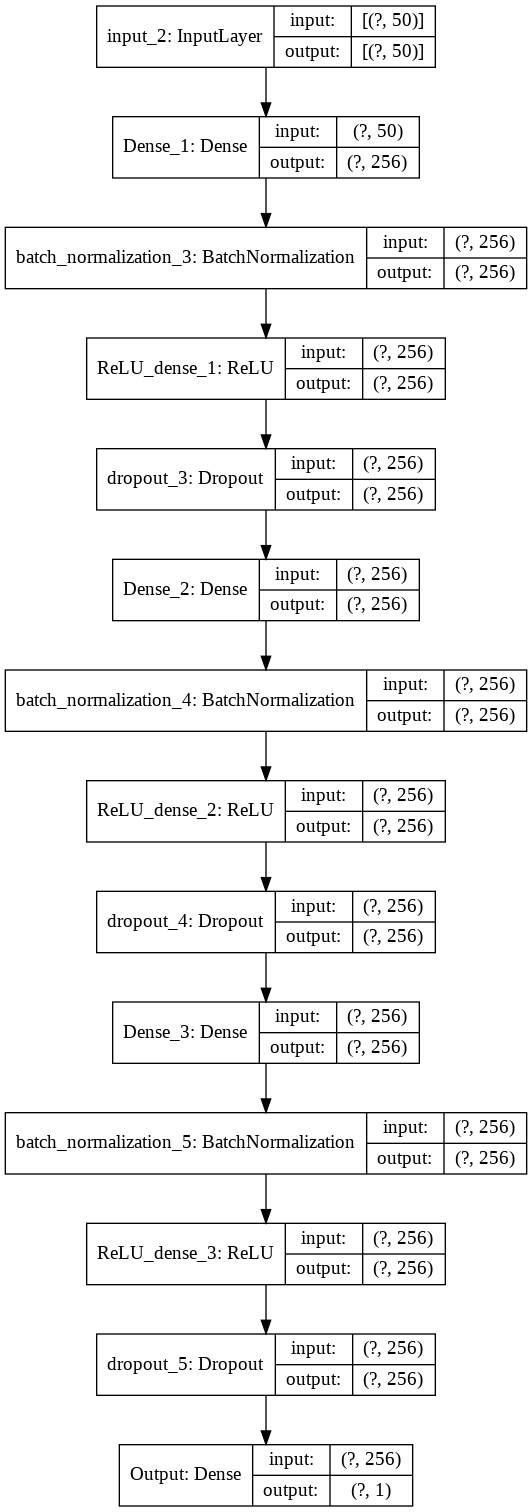

In [23]:
#Model definition (functional)

inputs = keras.Input(shape=(50))
x = inputs

x = keras.layers.Dense(256, name='Dense_1')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_dense_1')(x)
x = keras.layers.Dropout(rate=0.5)(x)
x = keras.layers.Dense(256, name='Dense_2')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_dense_2')(x)
x = keras.layers.Dropout(rate=0.2)(x)
x = keras.layers.Dense(256, name='Dense_3')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_dense_3')(x)
x = keras.layers.Dropout(rate=0.2)(x)
outputs = keras.layers.Dense(1, activation='sigmoid', name='Output')(x)

#x = keras.layers.Dense(256, activation='relu')(x)
#x = keras.layers.Dense(256, activation='relu')(x)
#outputs = keras.layers.Dense(2,activation='softmax', name='Output')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='MiniBooNE_CNN')

model.summary()

keras.utils.plot_model(model, show_shapes=True)

Si utilizza un learning rate oscillante per provare ad ottenere risultati migliori.

In [24]:
#LR_ST=1e-4
first_decay_steps = 100
initial_learning_rate=1e-2

lr_schedule = keras.experimental.CosineDecayRestarts( 
      initial_learning_rate,
      first_decay_steps)

OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

EAGERLY = False
auc = keras.metrics.AUC()

model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy', auc],
              run_eagerly=EAGERLY)

In [25]:

model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath = 'best_epoch',
        verbose = 0,
        save_weights_only = True, 
        save_freq = 'epoch',
        save_best_only = True,
        mode ='min')

callbacks = [ model_checkpoint ]

history = model.fit(X_train, Y_train_nc, epochs=1000, batch_size=128,
                    validation_split=0.2, shuffle=True, verbose=2,
                    callbacks=callbacks)

                    

Epoch 1/1000
618/618 - 4s - loss: 0.2038 - accuracy: 0.9156 - auc_1: 0.9660 - val_loss: 0.1712 - val_accuracy: 0.9296 - val_auc_1: 0.9780
Epoch 2/1000
618/618 - 3s - loss: 0.1761 - accuracy: 0.9283 - auc_1: 0.9742 - val_loss: 0.1812 - val_accuracy: 0.9229 - val_auc_1: 0.9801
Epoch 3/1000
618/618 - 4s - loss: 0.1679 - accuracy: 0.9323 - auc_1: 0.9764 - val_loss: 0.1781 - val_accuracy: 0.9272 - val_auc_1: 0.9770
Epoch 4/1000
618/618 - 4s - loss: 0.1635 - accuracy: 0.9335 - auc_1: 0.9775 - val_loss: 0.1587 - val_accuracy: 0.9378 - val_auc_1: 0.9805
Epoch 5/1000
618/618 - 4s - loss: 0.1524 - accuracy: 0.9383 - auc_1: 0.9805 - val_loss: 0.1438 - val_accuracy: 0.9422 - val_auc_1: 0.9825
Epoch 6/1000
618/618 - 3s - loss: 0.1646 - accuracy: 0.9344 - auc_1: 0.9772 - val_loss: 0.1764 - val_accuracy: 0.9302 - val_auc_1: 0.9793
Epoch 7/1000
618/618 - 4s - loss: 0.1589 - accuracy: 0.9365 - auc_1: 0.9789 - val_loss: 0.1588 - val_accuracy: 0.9373 - val_auc_1: 0.9809
Epoch 8/1000
618/618 - 3s - loss: 

In [26]:
model.load_weights('best_epoch')

In [27]:
test_loss, test_acc, test_auc = model.evaluate(X_test, Y_test_nc, verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
print('\nTest auc:', test_auc)


772/772 [==============================] - 2s 3ms/step - loss: 0.1227 - accuracy: 0.9522 - auc_1: 0.9870

Test loss: 0.12267481535673141

Test accuracy: 0.9522190093994141

Test auc: 0.9870461225509644


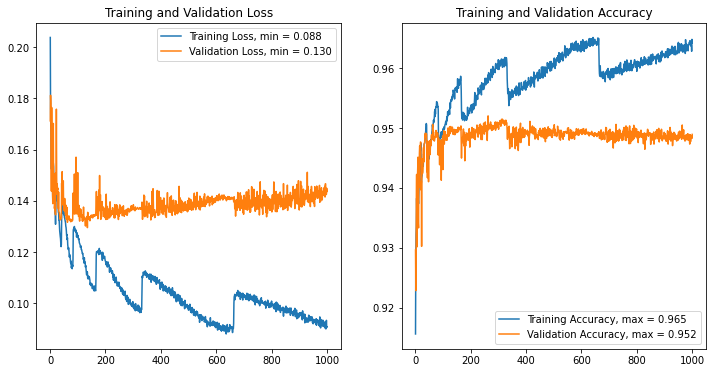

In [28]:
#plot della loss e della accuracy durante il training
plt.close()
plt.figure(figsize=(12, 6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
max_acc = np.amax(acc)
max_val_acc = np.amax(val_acc)

loss=history.history['loss']
val_loss=history.history['val_loss']
min_loss = np.amin(loss)
min_val_loss = np.amin(val_loss)

epochs_range = range(1, len(loss) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss, min = %.3f'%min_loss)
plt.plot(epochs_range, val_loss, label='Validation Loss, min = %.3f'%min_val_loss)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy, max = %.3f'%max_acc)
plt.plot(epochs_range, val_acc, label='Validation Accuracy, max = %.3f'%max_val_acc)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

Si prova quindi con un lr fisso ottimizzato con adam:

In [33]:
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=1e-4)

EAGERLY = False
auc = keras.metrics.AUC()

model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy', auc],
              run_eagerly=EAGERLY)

In [34]:

model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath = 'best_epoch_K_DECAY',
        verbose = 0,
        save_weights_only = True, 
        save_freq = 'epoch',
        save_best_only = True,
        mode ='min')

callbacks = [ model_checkpoint ]

history = model.fit(X_train, Y_train_nc, epochs=1000, batch_size=128,
                    validation_split=0.2, shuffle=True, verbose=2,
                    callbacks=callbacks)

                    

Epoch 1/1000
618/618 - 4s - loss: 0.1068 - accuracy: 0.9570 - auc_2: 0.9903 - val_loss: 0.1333 - val_accuracy: 0.9496 - val_auc_2: 0.9845
Epoch 2/1000
618/618 - 3s - loss: 0.1069 - accuracy: 0.9574 - auc_2: 0.9902 - val_loss: 0.1333 - val_accuracy: 0.9491 - val_auc_2: 0.9844
Epoch 3/1000
618/618 - 3s - loss: 0.1078 - accuracy: 0.9576 - auc_2: 0.9900 - val_loss: 0.1331 - val_accuracy: 0.9494 - val_auc_2: 0.9845
Epoch 4/1000
618/618 - 3s - loss: 0.1073 - accuracy: 0.9571 - auc_2: 0.9901 - val_loss: 0.1333 - val_accuracy: 0.9493 - val_auc_2: 0.9844
Epoch 5/1000
618/618 - 3s - loss: 0.1079 - accuracy: 0.9570 - auc_2: 0.9900 - val_loss: 0.1329 - val_accuracy: 0.9496 - val_auc_2: 0.9844
Epoch 6/1000
618/618 - 3s - loss: 0.1071 - accuracy: 0.9568 - auc_2: 0.9902 - val_loss: 0.1334 - val_accuracy: 0.9493 - val_auc_2: 0.9843
Epoch 7/1000
618/618 - 3s - loss: 0.1075 - accuracy: 0.9566 - auc_2: 0.9901 - val_loss: 0.1331 - val_accuracy: 0.9494 - val_auc_2: 0.9843
Epoch 8/1000
618/618 - 4s - loss: 

In [35]:
model.load_weights('best_epoch_K_DECAY')

In [36]:
test_loss, test_acc, test_auc = model.evaluate(X_test, Y_test_nc, verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
print('\nTest auc:', test_auc)


772/772 [==============================] - 2s 3ms/step - loss: 0.1245 - accuracy: 0.9526 - auc_2: 0.9865

Test loss: 0.12449786812067032

Test accuracy: 0.9526239037513733

Test auc: 0.9865204691886902


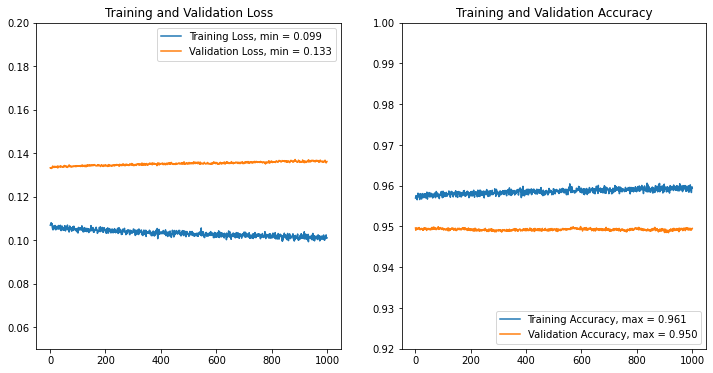

In [39]:
#plot della loss e della accuracy durante il training
plt.close()
plt.figure(figsize=(12, 6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
max_acc = np.amax(acc)
max_val_acc = np.amax(val_acc)

loss=history.history['loss']
val_loss=history.history['val_loss']
min_loss = np.amin(loss)
min_val_loss = np.amin(val_loss)

epochs_range = range(1, len(loss) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss, min = %.3f'%min_loss)
plt.plot(epochs_range, val_loss, label='Validation Loss, min = %.3f'%min_val_loss)
plt.legend(loc='upper right')
plt.ylim(0.05,0.2)
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy, max = %.3f'%max_acc)
plt.plot(epochs_range, val_acc, label='Validation Accuracy, max = %.3f'%max_val_acc)
plt.legend(loc='lower right')
plt.ylim(0.92,1)
plt.title('Training and Validation Accuracy')
plt.show()

In [44]:
#LR_ST=1e-4
first_decay_steps = 50
initial_learning_rate=0.5e-2

lr_schedule = keras.experimental.CosineDecayRestarts( 
      initial_learning_rate,
      first_decay_steps)

OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

EAGERLY = False
auc = keras.metrics.AUC()

model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy', auc],
              run_eagerly=EAGERLY)

In [45]:

model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath = 'best_epoch_cosine_new',
        verbose = 0,
        save_weights_only = True, 
        save_freq = 'epoch',
        save_best_only = True,
        mode ='min')

callbacks = [ model_checkpoint ]

history = model.fit(X_train, Y_train_nc, epochs=1000, batch_size=128,
                    validation_split=0.2, shuffle=True, verbose=2,
                    callbacks=callbacks)

                    

Epoch 1/1000
618/618 - 4s - loss: 0.1105 - accuracy: 0.9556 - auc_5: 0.9895 - val_loss: 0.1342 - val_accuracy: 0.9491 - val_auc_5: 0.9847
Epoch 2/1000
618/618 - 3s - loss: 0.1112 - accuracy: 0.9553 - auc_5: 0.9894 - val_loss: 0.1340 - val_accuracy: 0.9490 - val_auc_5: 0.9839
Epoch 3/1000
618/618 - 4s - loss: 0.1103 - accuracy: 0.9555 - auc_5: 0.9896 - val_loss: 0.1369 - val_accuracy: 0.9481 - val_auc_5: 0.9837
Epoch 4/1000
618/618 - 4s - loss: 0.1100 - accuracy: 0.9552 - auc_5: 0.9897 - val_loss: 0.1330 - val_accuracy: 0.9498 - val_auc_5: 0.9844
Epoch 5/1000
618/618 - 4s - loss: 0.1092 - accuracy: 0.9562 - auc_5: 0.9898 - val_loss: 0.1328 - val_accuracy: 0.9495 - val_auc_5: 0.9845
Epoch 6/1000
618/618 - 3s - loss: 0.1114 - accuracy: 0.9552 - auc_5: 0.9894 - val_loss: 0.1353 - val_accuracy: 0.9491 - val_auc_5: 0.9849
Epoch 7/1000
618/618 - 4s - loss: 0.1102 - accuracy: 0.9560 - auc_5: 0.9896 - val_loss: 0.1333 - val_accuracy: 0.9488 - val_auc_5: 0.9844
Epoch 8/1000
618/618 - 4s - loss: 

In [46]:
model.load_weights('best_epoch_cosine_new')

In [47]:
test_loss, test_acc, test_auc = model.evaluate(X_test, Y_test_nc, verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
print('\nTest auc:', test_auc)


772/772 [==============================] - 2s 3ms/step - loss: 0.1251 - accuracy: 0.9517 - auc_5: 0.9868

Test loss: 0.12506726384162903

Test accuracy: 0.9517330527305603

Test auc: 0.9868469834327698


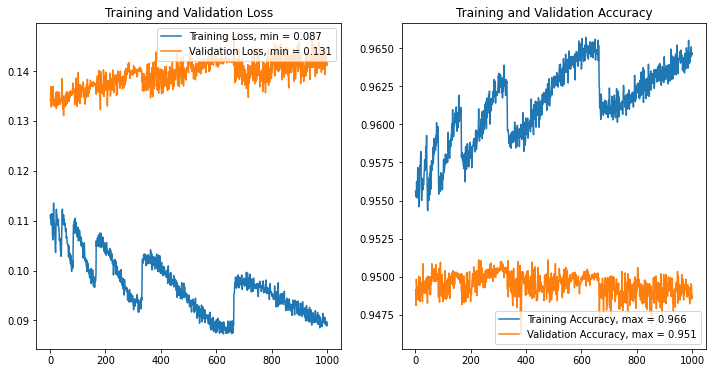

In [48]:
#plot della loss e della accuracy durante il training
plt.close()
plt.figure(figsize=(12, 6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
max_acc = np.amax(acc)
max_val_acc = np.amax(val_acc)

loss=history.history['loss']
val_loss=history.history['val_loss']
min_loss = np.amin(loss)
min_val_loss = np.amin(val_loss)

epochs_range = range(1, len(loss) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss, min = %.3f'%min_loss)
plt.plot(epochs_range, val_loss, label='Validation Loss, min = %.3f'%min_val_loss)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy, max = %.3f'%max_acc)
plt.plot(epochs_range, val_acc, label='Validation Accuracy, max = %.3f'%max_val_acc)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

Si prova a modificare qualche iperparametro del cosine decay:

Model: "MiniBooNE_CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
Dense_1 (Dense)              (None, 256)               13056     
_________________________________________________________________
batch_normalization_12 (Batc (None, 256)               1024      
_________________________________________________________________
ReLU_dense_1 (ReLU)          (None, 256)               0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 256)               0         
_________________________________________________________________
Dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
batch_normalization_13 (Batc (None, 256)             

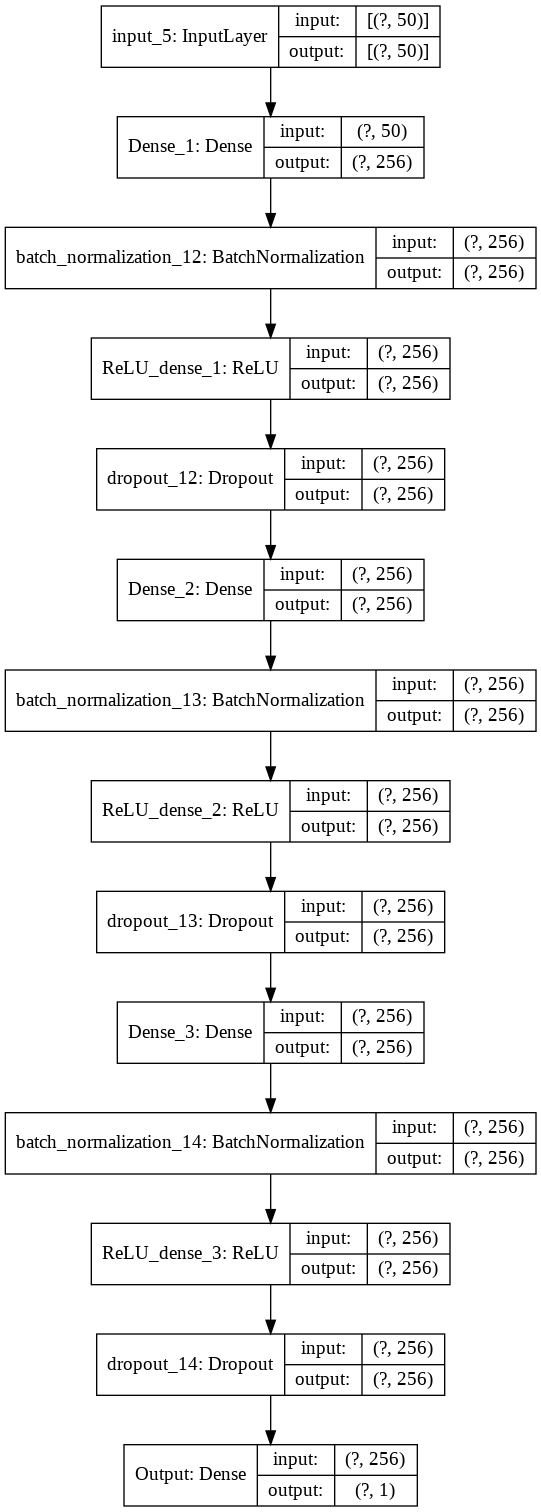

In [64]:
#Model definition (functional)

inputs = keras.Input(shape=(50))
x = inputs

x = keras.layers.Dense(256, name='Dense_1')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_dense_1')(x)
x = keras.layers.Dropout(rate=0.5)(x)
x = keras.layers.Dense(256, name='Dense_2')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_dense_2')(x)
x = keras.layers.Dropout(rate=0.2)(x)
x = keras.layers.Dense(256, name='Dense_3')(x)
x = keras.layers.BatchNormalization()(x)
x = keras.layers.ReLU(name='ReLU_dense_3')(x)
x = keras.layers.Dropout(rate=0.2)(x)
outputs = keras.layers.Dense(1, activation='sigmoid', name='Output')(x)

#x = keras.layers.Dense(256, activation='relu')(x)
#x = keras.layers.Dense(256, activation='relu')(x)
#outputs = keras.layers.Dense(2,activation='softmax', name='Output')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='MiniBooNE_CNN')

model.summary()

keras.utils.plot_model(model, show_shapes=True)

In [65]:
#LR_ST=1e-4
first_decay_steps = 1000
initial_learning_rate=1e-2

lr_schedule = keras.experimental.CosineDecayRestarts( 
      1e-2,
      1000)

OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

EAGERLY = False
auc = keras.metrics.AUC()

model.compile(optimizer=OPTIMIZER,
              loss='binary_crossentropy',
              metrics=['accuracy', auc],
              run_eagerly=EAGERLY)

In [66]:

model_checkpoint = keras.callbacks.ModelCheckpoint(
        filepath = 'best_epoch_cosine_1000_take2',
        verbose = 0,
        save_weights_only = True, 
        save_freq = 'epoch',
        save_best_only = True,
        mode ='min')

callbacks = [ model_checkpoint ]

history = model.fit(X_train, Y_train_nc, epochs=1000, batch_size=128,
                    validation_split=0.2, shuffle=True, verbose=2,
                    callbacks=callbacks)

                    

Epoch 1/1000
618/618 - 4s - loss: 0.1978 - accuracy: 0.9201 - auc_8: 0.9675 - val_loss: 0.1774 - val_accuracy: 0.9267 - val_auc_8: 0.9761
Epoch 2/1000
618/618 - 3s - loss: 0.1717 - accuracy: 0.9307 - auc_8: 0.9754 - val_loss: 0.2483 - val_accuracy: 0.8966 - val_auc_8: 0.9613
Epoch 3/1000
618/618 - 3s - loss: 0.1693 - accuracy: 0.9313 - auc_8: 0.9761 - val_loss: 0.1705 - val_accuracy: 0.9322 - val_auc_8: 0.9776
Epoch 4/1000
618/618 - 4s - loss: 0.1578 - accuracy: 0.9371 - auc_8: 0.9791 - val_loss: 0.1459 - val_accuracy: 0.9414 - val_auc_8: 0.9824
Epoch 5/1000
618/618 - 4s - loss: 0.1503 - accuracy: 0.9392 - auc_8: 0.9811 - val_loss: 0.2595 - val_accuracy: 0.8672 - val_auc_8: 0.9686
Epoch 6/1000
618/618 - 4s - loss: 0.1650 - accuracy: 0.9337 - auc_8: 0.9773 - val_loss: 0.1661 - val_accuracy: 0.9317 - val_auc_8: 0.9784
Epoch 7/1000
618/618 - 4s - loss: 0.1582 - accuracy: 0.9359 - auc_8: 0.9792 - val_loss: 0.1680 - val_accuracy: 0.9294 - val_auc_8: 0.9815
Epoch 8/1000
618/618 - 4s - loss: 

In [67]:
model.load_weights('best_epoch_cosine_1000_take2')

In [68]:
test_loss, test_acc, test_auc = model.evaluate(X_test, Y_test_nc, verbose=1)
print('\nTest loss:', test_loss)
print('\nTest accuracy:', test_acc)
print('\nTest auc:', test_auc)


772/772 [==============================] - 2s 3ms/step - loss: 0.1234 - accuracy: 0.9515 - auc_8: 0.9871

Test loss: 0.1233726367354393

Test accuracy: 0.9514901041984558

Test auc: 0.9871402978897095


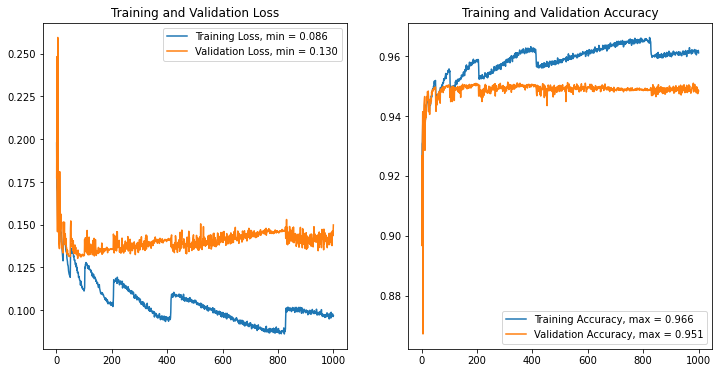

In [69]:
#plot della loss e della accuracy durante il training
plt.close()
plt.figure(figsize=(12, 6))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
max_acc = np.amax(acc)
max_val_acc = np.amax(val_acc)

loss=history.history['loss']
val_loss=history.history['val_loss']
min_loss = np.amin(loss)
min_val_loss = np.amin(val_loss)

epochs_range = range(1, len(loss) + 1)

plt.subplot(1, 2, 1)
plt.plot(epochs_range, loss, label='Training Loss, min = %.3f'%min_loss)
plt.plot(epochs_range, val_loss, label='Validation Loss, min = %.3f'%min_val_loss)
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, acc, label='Training Accuracy, max = %.3f'%max_acc)
plt.plot(epochs_range, val_acc, label='Validation Accuracy, max = %.3f'%max_val_acc)
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()